In [17]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import random

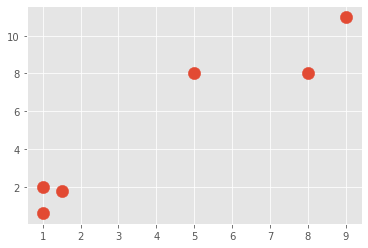

In [18]:
style.use('ggplot')


X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8],
              [8, 8],
              [1, 0.6],
              [9, 11]])

plt.scatter(X[:, 0], X[:, 1], s=150)
plt.show()

colors = 10*["g", "r", "c", "b", "k"]

In [19]:
class KMeans:

    def __init__(self, k=2, tol=0.001, max_iter=100):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        self.data = None
        self.centroids = {}

        self._prev_centroids = {}
        self._optimized = False

    def fit(self, data):

        self.data = data
        self._init_centroids()

        for _ in range(self.max_iter):

            self._init_clusters()
            self._distribute_data_to_cluster()
            self._recalculate_centroids()
            self._evaluate_centroids()

            if self._optimized:
                break

    def predict(self, data):
        _distances = self._calculate_distances(data)
        return self._get_closest_cluster(_distances)

    def _init_clusters(self):
        self.clusters = {i: [] for i in range(self.k)}

    def _distribute_data_to_cluster(self):
        """ Split dataset into k cluster """

        for data in self.data:
            _distances = self._calculate_distances(data)
            _cluster = self._get_closest_cluster(_distances)
            self.clusters[_cluster].append(data)

    def _recalculate_centroids(self):
        """ Recalculate new centroid using means of data inside the cluster """

        self._prev_centroids = dict(self.centroids)
        for cluster in self.clusters:
            self.centroids[cluster] = np.average(self.clusters[cluster], axis=0)


    def _evaluate_centroids(self):
        """ Check whether the centroid is optimized (final) """

        for c in self.centroids:
            _prev_cent = self._prev_centroids[c]
            _curr_cent = self.centroids[c]
            if np.sum((_curr_cent - _prev_cent) / _prev_cent * 100.0) <= self.tol:
                self._optimized = True
                return

    def _get_closest_cluster(self, distances):
        return distances.index(min(distances))

    def _calculate_distances(self, data):
        return [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]


    def _init_centroids(self):
        self.centroids = {}
        self._prev_centroids = {}

        np.random.shuffle(self.data)
        self.centroids = {i:self.data[i] for i in range(self.k)}

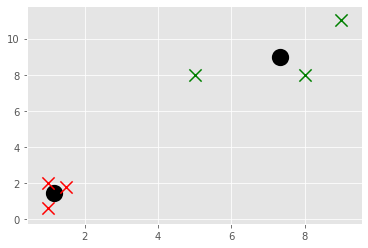

In [20]:
if __name__ == "__main__":

    clf = KMeans()
    clf.fit(X)

    for centroid in clf.centroids:
        plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                    marker="o", color="k", s=150, linewidths=5)

    for cluster in clf.clusters:
        color = colors[cluster]
        for featureset in clf.clusters[cluster]:
            plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)

    plt.show()